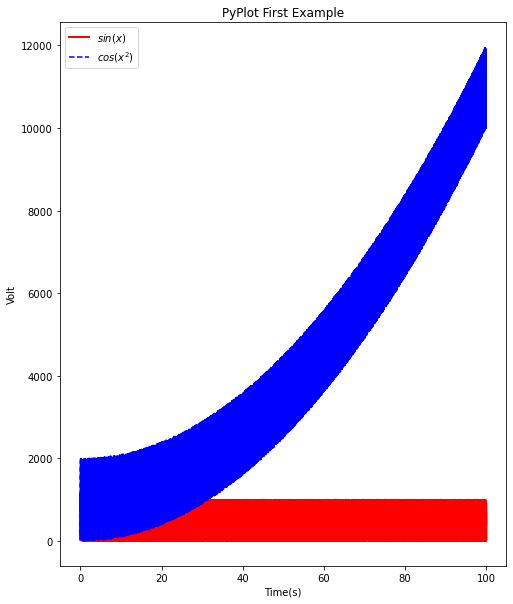

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 函数 z = x*x + 2*y, 生成 2000 个样本， x是从 0-100 之间均匀分布的2000个数字，y是<1000的2000个数字 ；
total = 80000
x = np.linspace(0, 100, total)
y = np.random.randint(1000,size=total)
z = x**2 + 2*y

plt.figure(figsize=(8,10))
plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
plt.plot(x,z,"b--",label="$cos(x^2)$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
#plt.ylim(0, 15000)
plt.legend()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 读入数据
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#x_train.shape

#len(x_train[0])

input = np.zeros([total,2])
print(input.shape)

(80000, 2)


In [4]:
output = np.zeros(total)

for i in range(total):
    input[i] = (x[i], y[i])
    output[i] = z[i]

print(input.shape)
print(output.shape)
print(input[0], output[0])
print(input[1], output[1])
print(input[2], output[2])
print(input[200], output[200])

(80000, 2)
(80000,)
[  0. 998.] 1996.0
[1.25001563e-03 7.17000000e+02] 1434.000001562539
[2.50003125e-03 4.63000000e+02] 926.0000062501563
[2.50003125e-01 7.89000000e+02] 1578.0625015625294


In [4]:
import tensorflow as tf
(x_train, y_train) = (input,output)

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.02),
              loss='mean_squared_error', metrics=['mae','mse'])

#训练模型
history = model.fit(x_train, y_train, epochs=15)

Metal device set to: Apple M1


2021-10-25 00:07:28.400463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-25 00:07:28.400559: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/15
   1/2500 [..............................] - ETA: 7:52 - loss: 28368512.0000 - mae: 4515.1528 - mse: 28368512.0000

2021-10-25 00:07:28.630401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-25 00:07:28.630593: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-25 00:07:28.765041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2500/2500 [==============================] - 11s 4ms/step - loss: 934144.5625 - mae: 698.5642 - mse: 934144.5625
Epoch 2/15
2500/2500 [==============================] - 10s 4ms/step - loss: 442709.1562 - mae: 478.0376 - mse: 442709.1562
Epoch 3/15
2500/2500 [==============================] - 11s 4ms/step - loss: 334157.9688 - mae: 391.8257 - mse: 334157.9688
Epoch 4/15
2500/2500 [==============================] - 10s 4ms/step - loss: 268398.5000 - mae: 342.7505 - mse: 268398.5000
Epoch 5/15
2500/2500 [==============================] - 10s 4ms/step - loss: 235225.5781 - mae: 316.7630 - mse: 235225.5781
Epoch 6/15
2500/2500 [==============================] - 10s 4ms/step - loss: 202804.1719 - mae: 290.5476 - mse: 202804.1719
Epoch 7/15
2500/2500 [==============================] - 10s 4ms/step - loss: 180354.0312 - mae: 272.9164 - mse: 180354.0312
Epoch 8/15
2500/2500 [==============================] - 10s 4ms/step - loss: 164144.0938 - mae: 258.4620 - mse: 164144.0938
Epoch 9/15
2500/250

In [6]:
model.predict([[45,100],[10,20],[30,50],[60,80]])

array([[2248.1597 ],
       [ 349.17575],
       [1010.4763 ],
       [3668.6475 ]], dtype=float32)

In [6]:
import tensorflow as tf
(x_train, y_train) = (input,output)

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.02),
              loss='mean_squared_error', metrics=['mae','mse'])

#训练模型
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
  10/2500 [..............................] - ETA: 15s - loss: 30461462.0000 - mae: 4468.2798 - mse: 30461462.0000  

2021-10-25 00:14:56.579814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2500/2500 [==============================] - 16s 6ms/step - loss: 843013.7500 - mae: 618.9134 - mse: 843013.7500
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 178815.0781 - mae: 293.3965 - mse: 178815.0781
Epoch 3/10
2500/2500 [==============================] - 16s 6ms/step - loss: 84607.8516 - mae: 197.8997 - mse: 84607.8516
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 58478.6445 - mae: 163.4881 - mse: 58478.6445
Epoch 5/10
2500/2500 [==============================] - 16s 6ms/step - loss: 48564.8008 - mae: 154.2717 - mse: 48564.8008
Epoch 6/10
2500/2500 [==============================] - 16s 6ms/step - loss: 59235.3047 - mae: 156.4817 - mse: 59235.3047
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 38436.9062 - mae: 146.4743 - mse: 38436.9062
Epoch 8/10
2500/2500 [==============================] - 16s 6ms/step - loss: 24910.1484 - mae: 118.6561 - mse: 24910.1484
Epoch 9/10
2500/2500 [=========

In [7]:
model.predict([[45,100],[10,20],[30,50],[60,80]])

2021-10-25 00:18:06.056336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[2117.375  ],
       [ 223.93542],
       [1085.9729 ],
       [3600.0576 ]], dtype=float32)